In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
import plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

import keras
from keras import Sequential
import tensorflow as tf
from keras.layers import SimpleRNN
from keras import models
from keras import layers

from copy import copy

In [2]:
PHNag_df = pd.read_csv("PHN_aggregatd.csv", index_col = 0)

In [3]:
PHNss_df = pd.read_csv("X_data.csv")

In [4]:
PHNss_df.head()

,Unnamed: 0,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),...,tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,3,18087.633040,2971.250703,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,...,2.491605,0.069589,0.008294,0.029984,0.000162,0.085792,19.130331,0.012273,123.013407,2.363106
1,4,35119.155518,2546.504451,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,...,1.776488,0.073601,0.010835,0.037541,0.000160,0.069981,17.626720,0.009399,76.115827,2.312663
2,5,31723.880665,1163.450863,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,...,3.528071,0.074748,0.007420,0.058981,0.000150,0.067458,11.149554,0.011840,87.480619,2.113083
3,6,17885.692846,3043.770618,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,...,1.640167,0.068951,0.009030,0.042338,0.000288,0.093335,9.438720,0.013712,72.067875,2.977916
4,9,30331.086522,2278.322744,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,...,1.859182,0.054088,0.007173,0.056029,0.000117,0.084184,20.728823,0.008027,102.415199,2.053384


In [5]:
PHNss_df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
PHNss_df.shape

(5344, 76)

In [7]:
 #PHNss_df  = PHNss_df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 49, 55, 56, 57, 61, 62, 63, 64, 65, 67, 68, 69, 70, 75]]

In [8]:
PHNag_df

,n_ap,first_ap_time,first_ap_amp,first_ap_width
0,2,6,58.881427,13.620909
1,3,6,46.183495,7.132705
2,1,7,34.122383,8.834176
3,1,7,41.796535,4.948380
4,1,6,57.832149,52.102653
...,...,...,...,...
5339,2,7,42.798500,8.396907
5340,1,7,52.140596,73.301461
5341,1,7,46.796831,8.157181
5342,1,7,53.797265,16.934689


In [9]:
PHNn_ap_df = PHNag_df['n_ap']

In [10]:
PHNag_df = PHNag_df[['first_ap_time','first_ap_amp','first_ap_width']]

In [11]:
ag_indexes = ~pd.isna(PHNag_df).any(axis=1)

In [12]:
PHNss_ag_df = PHNss_df[ag_indexes]
PHNag_df  = PHNag_df [ag_indexes]
print(PHNss_ag_df.shape)
print(PHNag_df.shape)

(5344, 76)
(5344, 3)


In [13]:
PHNss_ag_df

,V_myo(um3),V_SR(um3),V_myo_uL(uL),V_SR_uL(uL),i_NaK_max(uA),K_m_K(mM),K_m_Na(mM),K_o(millimolar),Na_o(millimolar),Ca_TRPN_Max(mM),...,tau_R(ms),phi_R,theta_R,K_RyR(mM),K_L(mM),a,b,c,d,tau_s_ss
0,18087.633040,2971.250703,0.000033,0.000003,0.000103,1.634672,8.457044,6.694638,184.384591,0.083447,...,2.491605,0.069589,0.008294,0.029984,0.000162,0.085792,19.130331,0.012273,123.013407,2.363106
1,35119.155518,2546.504451,0.000024,0.000001,0.000080,1.266706,7.810010,3.160808,112.247246,0.101991,...,1.776488,0.073601,0.010835,0.037541,0.000160,0.069981,17.626720,0.009399,76.115827,2.312663
2,31723.880665,1163.450863,0.000018,0.000002,0.000052,1.955174,9.439872,3.730495,149.609915,0.088179,...,3.528071,0.074748,0.007420,0.058981,0.000150,0.067458,11.149554,0.011840,87.480619,2.113083
3,17885.692846,3043.770618,0.000022,0.000003,0.000125,0.971169,6.645655,4.763852,74.651845,0.069008,...,1.640167,0.068951,0.009030,0.042338,0.000288,0.093335,9.438720,0.013712,72.067875,2.977916
4,30331.086522,2278.322744,0.000038,0.000003,0.000069,1.539212,9.291735,2.934818,167.996222,0.103373,...,1.859182,0.054088,0.007173,0.056029,0.000117,0.084184,20.728823,0.008027,102.415199,2.053384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,29686.697458,1051.560825,0.000032,0.000003,0.000137,1.545477,12.402027,4.349500,168.432829,0.093633,...,3.196147,0.069653,0.008720,0.025202,0.000140,0.037697,11.516852,0.014368,139.310956,3.084144
5340,14571.354624,1386.516522,0.000020,0.000001,0.000096,1.321781,7.314302,5.223747,146.514228,0.091678,...,2.427242,0.070424,0.009969,0.055870,0.000264,0.073526,12.098269,0.014361,110.857333,1.108004
5341,32437.538891,2095.063478,0.000022,0.000003,0.000092,1.545330,8.810272,7.539690,207.497693,0.068950,...,3.502983,0.052886,0.009852,0.023352,0.000201,0.062598,19.120915,0.012294,77.995824,2.526280
5342,28460.428755,2809.654831,0.000015,0.000002,0.000115,1.331515,9.105736,7.301446,132.468385,0.087496,...,1.643484,0.057020,0.008370,0.027257,0.000214,0.043176,18.504241,0.013315,55.964035,1.410034


In [14]:
PHNag_df

,first_ap_time,first_ap_amp,first_ap_width
0,6,58.881427,13.620909
1,6,46.183495,7.132705
2,7,34.122383,8.834176
3,7,41.796535,4.948380
4,6,57.832149,52.102653
...,...,...,...
5339,7,42.798500,8.396907
5340,7,52.140596,73.301461
5341,7,46.796831,8.157181
5342,7,53.797265,16.934689


In [15]:
HHss_ag = PHNss_ag_df.values
HHag = PHNag_df .values

# Standardize and scale

In [16]:
X_Train, X_test, y_Train, y_test = train_test_split(HHss_ag,HHag,test_size=0.3,random_state=111)

In [17]:
scx = StandardScaler()
scy = StandardScaler()


X_Train = scx.fit_transform(X_Train)
y_Train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_Train,y_Train,test_size=0.2,random_state=1234)

## Models train

In [19]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
  
  

In [20]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [21]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001)

In [22]:
callbacks = [callback,reduce_lr]

In [23]:
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D,Dropout,Dense,BatchNormalization,GlobalMaxPooling1D
from keras import layers

In [24]:

from keras.utils.vis_utils import plot_model

In [25]:
model1 = Sequential()
model1.add(Conv1D(2, 2, padding ="same", activation='relu', input_shape=(X_train.shape[1], 1)))

model1.add(layers.MaxPooling1D(1))

# model1.add(Conv1D(128, 10,activation='relu'))

# model1.add(MaxPooling1D(1))

# model1.add(Conv1D(128, 10, activation='relu'))


# model1.add(MaxPooling1D(1))


# model1.add(Conv1D(128, 10, activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(4, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(3))
print(model1.summary())
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=[r_square])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 76, 2)             6         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 76, 2)             0         
_________________________________________________________________
flatten (Flatten)            (None, 152)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 612       
_________________________________________________________________
batch_normalization (BatchNo (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 649
Trainable params: 641
Non-trainable params: 8
__________________________________________________________

In [26]:
X_train = X_train.reshape(2992,76,1)

In [27]:
history1 = model1.fit(X_train, y_train,
                  epochs=100,
                  batch_size=64,
                  validation_data=(X_val.reshape(X_val.shape[0],X_val.shape[1],1), y_val), callbacks=[callbacks])

Epoch 1/100
47/47 [==============================] - 0s 6ms/step - loss: 2.2568 - r_square: -1.2812 - val_loss: 1.2138 - val_r_square: -0.2664
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 1.7207 - r_square: -0.7384 - val_loss: 1.1858 - val_r_square: -0.2378
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 1.3715 - r_square: -0.3785 - val_loss: 1.1465 - val_r_square: -0.1975
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 1.1192 - r_square: -0.1258 - val_loss: 1.0931 - val_r_square: -0.1424
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.9535 - r_square: 0.0491 - val_loss: 0.9813 - val_r_square: -0.0235
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.8503 - r_square: 0.1487 - val_loss: 0.8767 - val_r_square: 0.0880
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.7783 - r_square: 0.2244 - val_loss: 0.8096 - val_r_square: 0.1597
Epoc

Epoch 59/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3697 - r_square: 0.6331 - val_loss: 0.3746 - val_r_square: 0.6242
Epoch 60/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3705 - r_square: 0.6385 - val_loss: 0.3728 - val_r_square: 0.6262
Epoch 61/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3669 - r_square: 0.6405 - val_loss: 0.3730 - val_r_square: 0.6259
Epoch 62/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3678 - r_square: 0.6359 - val_loss: 0.3721 - val_r_square: 0.6270
Epoch 63/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3693 - r_square: 0.6380 - val_loss: 0.3725 - val_r_square: 0.6267
Epoch 64/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3682 - r_square: 0.6347 - val_loss: 0.3728 - val_r_square: 0.6263
Epoch 65/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3647 - r_square: 0.6406 - val_loss: 0.3746 - val_r_square: 0.6244
Epoch 

Text(0.5, 0, 'Epochs')

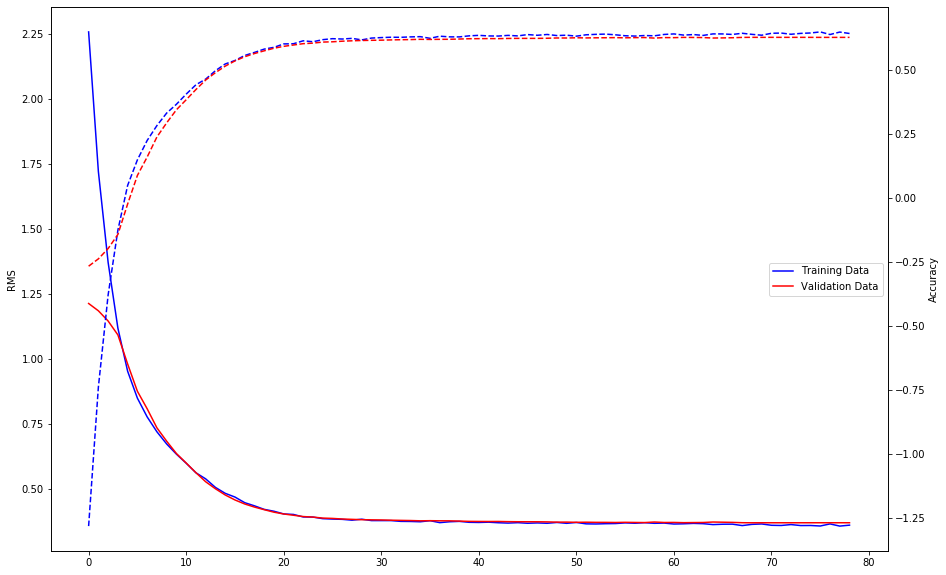

In [28]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history1.history['r_square'],'--',c='blue')
ax2.plot(history1.history['val_r_square'],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

In [29]:
X_test = X_test.reshape(1604,76,1)

In [30]:
results_df=pd.DataFrame()
ypred = model1.predict(X_test)

extra_results_df = pd.DataFrame([r2_score(y_test[:,i],ypred[:,i]) for i in range(3)],index=['first_ap_time','first_ap_amp','first_ap_width'],columns=['1500 epochs'])
results_df = pd.concat([results_df,extra_results_df],axis=1)
results_df

,1500 epochs
first_ap_time,0.685714
first_ap_amp,0.921878
first_ap_width,0.265920


# Permuted feature importance

In [32]:
target = PHNag_df.columns

In [33]:
from copy import copy

def Permuted_feature_impotance(_X,y,model,seeds=[234]):
  
  base_yhat = model.predict(_X)
  base_line = np.array(
      [mean_squared_error(y[:,c],base_yhat[:,c])
       for c in range(base_yhat.shape[1])])
  
  PFI = np.zeros((len(seeds),_X.shape[1],y.shape[1]))
  
  for i,seed in enumerate(seeds):
    
    np.random.RandomState(seed) # Sets the random state for numpy
    for j in range(X_test.shape[1]):
      
      X = copy(_X)
      X[:,j] = np.random.permutation(X[:,j])

      perm_yhat = model.predict(X)
      



      FI_perm = np.array([mean_squared_error(y[:,c],perm_yhat[:,c]) for c in range(perm_yhat.shape[1])])
      PFI[i,j,:] = FI_perm - base_line
  
  return PFI


In [34]:
%%time
seeds = [123*i for i in range(1,5)]
PFI = Permuted_feature_impotance(X_test,y_test,model1,seeds)

Wall time: 20.3 s


In [35]:
PFI.shape

(4, 76, 3)

In [36]:
PHNss_df.columns

Index(['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
   

In [37]:
names = ['V_myo(um3)', 'V_SR(um3)', 'V_myo_uL(uL)', 'V_SR_uL(uL)',
       'i_NaK_max(uA)', 'K_m_K(mM)', 'K_m_Na(mM)', 'K_o(millimolar)',
       'Na_o(millimolar)', 'Ca_TRPN_Max(mM)', 'g_Na(microS)', 'g_t(microS)',
       'a_endo', 'b_endo', 'g_ss(microS)', 'g_K1(microS)', 'g_f(microS)',
       'f_Na', 'g_B_Na(microS)', 'g_B_Ca(microS)', 'g_B_K(microS)',
       'E_Ca(millivolt)', 'Ca_o(millimolar)', 'g_D(um3_per_ms)',
       'J_R(um3_per_ms)', 'J_L(um3_per_ms)', 'N', 'K_mNa(mM)', 'K_mCa(mM)',
       'eta', 'k_sat', 'g_NCX(mM_per_ms)', 'g_SERCA(mM_per_ms)', 'K_SERCA(mM)',
       'g_pCa(mM_per_ms)', 'K_mpCa(mM)', 'g_CaB(mM_per_mV_ms)',
       'g_SRl(per_ms)', 'k_CMDN(mM)', 'B_CMDN(mM)', 'k_on(per_mM_per_ms)',
       'k_Ref_off(per_ms)', 'gamma_trpn', 'alpha_0(per_ms)',
       'alpha_r1(per_ms)', 'alpha_r2(per_ms)', 'n_Rel', 'K_z', 'n_Hill',
       'Ca_50ref(mM)', 'z_p', 'beta_1', 'beta_0', 'T_ref(N_per_mm2)',
       'a in component Cross_Bridges', 'A_1', 'A_2', 'A_3', 'alpha_1(per_ms)',
       'alpha_2(per_ms)', 'alpha_3(per_ms)', 'V_L(mV)', 'del_VL(mV)', 'phi_L',
       't_L(ms)', 'tau_L(ms)', 'tau_R(ms)', 'phi_R', 'theta_R', 'K_RyR(mM)',
       'K_L(mM)', 'a', 'b', 'c', 'd', 'tau_s_ss']

In [38]:
m = np.mean(PFI,axis=0)


In [39]:
m.shape

(76, 3)

In [40]:
pd.DataFrame(m)

,0,1,2
0,0.003751,0.034406,0.002527
1,-0.000353,-0.000014,-0.000692
2,0.043699,0.027925,0.061363
3,-0.000246,0.000124,0.020106
4,0.007753,0.000542,0.000298
...,...,...,...
71,-0.000185,-0.000114,-0.000479
72,-0.000161,-0.000029,0.002398
73,-0.000237,0.000004,-0.001148
74,0.000779,-0.000115,-0.000165


In [41]:
target

Index(['first_ap_time', 'first_ap_amp', 'first_ap_width'], dtype='object')

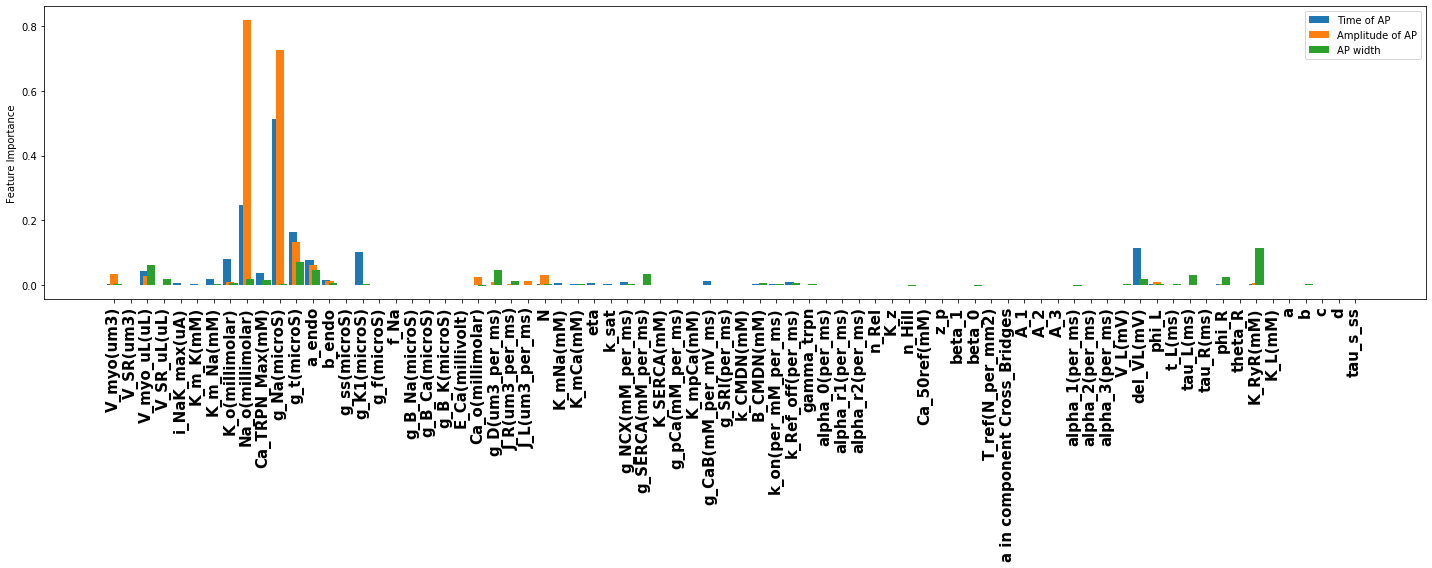

In [42]:
plt.figure(figsize=(20,8))
xa = np.array([i for i in range(len(names))])
plt.bar(xa-0.2,m[:,0],width=0.5)
plt.bar(xa,m[:,1],width=0.5)
plt.bar(xa+0.2,m[:,2],width=0.5)
plt.legend(['Time of AP','Amplitude of AP','AP width'])

plt.xticks(xa,names,fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical');
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
plt.ylabel('Feature Importance')
plt.tight_layout()
#plt.savefig("drive/My Drive/Figures/R2plots/HHperm_ag")

In [43]:
df = pd.DataFrame(m)

In [45]:
df.drop(df.index[[1,4,5,14,16,17,18,19,20,21,33,34,35,37,38,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,64,66,68,70,71,72,73,74,75]], inplace=True)

In [46]:
df.shape

(33, 3)

In [47]:
p = df.to_numpy()

In [52]:
len(names)

76

In [53]:
j = [0,2,3,6,7,8,9,10,11,12,13,15,22,23,24,25,26,27,28,29,30,31,32,36,39,40,41,42,62,63,65,67,69]

for i in range(len(names)):
    if i in j:
        print(names[i])

V_myo(um3)
V_myo_uL(uL)
V_SR_uL(uL)
K_m_Na(mM)
K_o(millimolar)
Na_o(millimolar)
Ca_TRPN_Max(mM)
g_Na(microS)
g_t(microS)
a_endo
b_endo
g_K1(microS)
Ca_o(millimolar)
g_D(um3_per_ms)
J_R(um3_per_ms)
J_L(um3_per_ms)
N
K_mNa(mM)
K_mCa(mM)
eta
k_sat
g_NCX(mM_per_ms)
g_SERCA(mM_per_ms)
g_CaB(mM_per_mV_ms)
B_CMDN(mM)
k_on(per_mM_per_ms)
k_Ref_off(per_ms)
gamma_trpn
del_VL(mV)
phi_L
tau_L(ms)
phi_R
K_RyR(mM)


In [54]:
 names = ['V_myo(um3)',
'V_myo_uL(uL)',
'V_SR_uL(uL)',
'K_m_Na(mM)',
'K_o(millimolar)',
'Na_o(millimolar)',
'Ca_TRPN_Max(mM)',
'g_Na(microS)',
'g_t(microS)',
'a_endo',
'b_endo',
'g_K1(microS)',
'Ca_o(millimolar)',
'g_D(um3_per_ms)',
'J_R(um3_per_ms)',
'J_L(um3_per_ms)',
'N',
'K_mNa(mM)',
'K_mCa(mM)',
'eta',
'k_sat',
'g_NCX(mM_per_ms)',
'g_SERCA(mM_per_ms)',
'g_CaB(mM_per_mV_ms)',
'B_CMDN(mM)',
'k_on(per_mM_per_ms)',
'k_Ref_off(per_ms)',
'gamma_trpn',
'del_VL(mV)',
'phi_L',
'tau_L(ms)',
'phi_R',
'K_RyR(mM)']

In [55]:
p.shape

(33, 3)

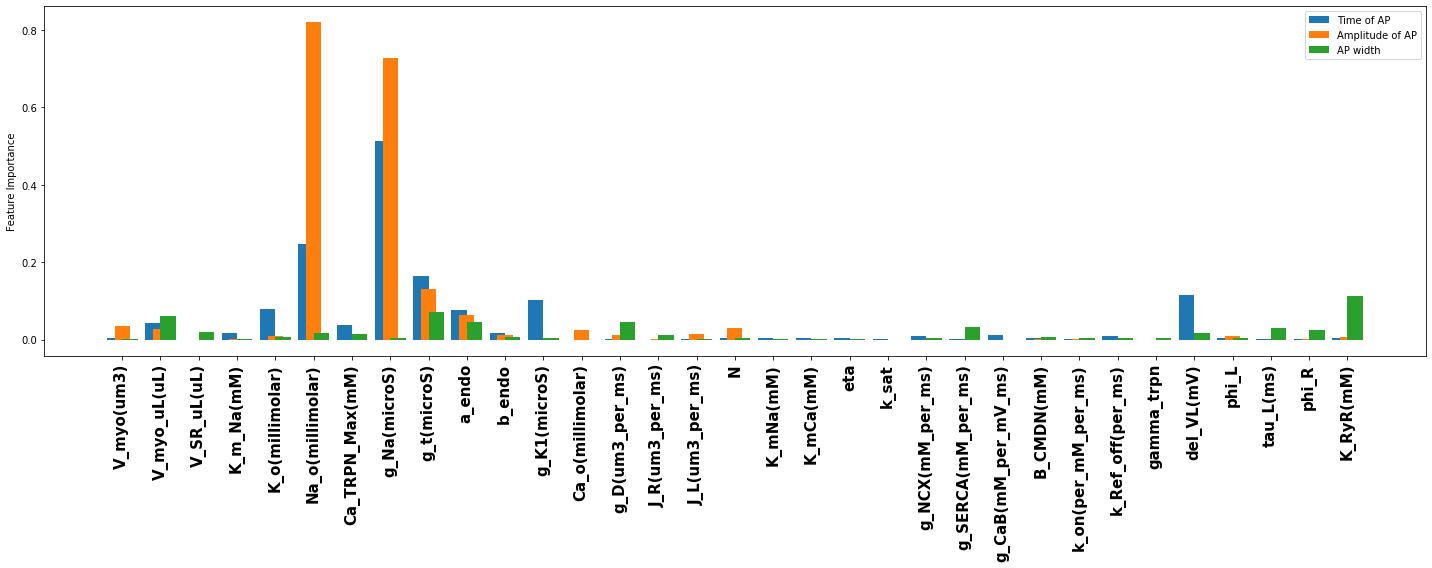

In [56]:
plt.figure(figsize=(20,8))
xa = np.array([i for i in range(len(names))])
plt.bar(xa-0.2,p[:,0],width=0.4)
plt.bar(xa,p[:,1],width=0.4)
plt.bar(xa+0.2,p[:,2],width=0.4)
plt.legend(['Time of AP','Amplitude of AP','AP width'])

plt.xticks(xa,names,fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical');
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
plt.ylabel('Feature Importance')
plt.tight_layout()